# Face Recognition with Deep Learning

## Importing the libraries

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import zipfile
import os
import dlib

## Detecting facial points (landmarks)

- These 68 point annotations come after the iBUG 300-W dataset, which the dlib facial landmark predictor was trained on. If you want to learn more about: https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

In [ ]:
image = cv2.imread('/content/people2.jpg')
face_detection = face_detector(image, 1)
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0,255,0), 1)

  print(len(points.parts()), points.parts())

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0,255,255), 2)
cv2_imshow(image)

68 points[(64, 204), (65, 212), (68, 219), (71, 227), (76, 233), (82, 239), (89, 243), (97, 247), (106, 246), (113, 243), (120, 236), (124, 229), (128, 220), (129, 212), (129, 204), (127, 195), (125, 187), (66, 197), (69, 193), (73, 190), (79, 190), (84, 190), (94, 187), (99, 184), (104, 181), (110, 181), (116, 183), (90, 194), (91, 198), (92, 202), (93, 206), (89, 212), (92, 212), (96, 212), (99, 210), (102, 208), (73, 201), (76, 199), (79, 198), (84, 198), (80, 199), (77, 201), (100, 193), (103, 191), (107, 190), (111, 190), (107, 191), (104, 192), (84, 223), (88, 219), (94, 216), (98, 216), (102, 214), (109, 214), (115, 215), (112, 225), (106, 230), (101, 232), (97, 232), (90, 231), (86, 223), (94, 218), (99, 218), (103, 216), (114, 216), (104, 226), (100, 227), (95, 228)]
68 points[(222, 161), (224, 168), (226, 175), (228, 183), (232, 190), (237, 195), (245, 199), (253, 202), (262, 202), (270, 199), (277, 194), (282, 188), (286, 180), (287, 172), (287, 163), (286, 155), (284, 147),

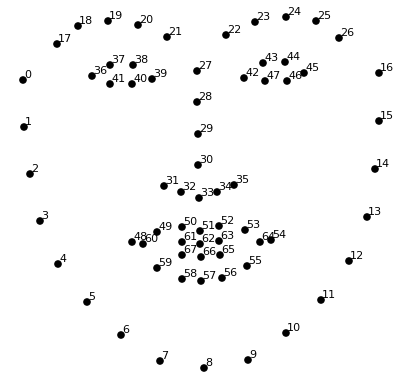

## Loading the dataset

In [ ]:
path = 'yalefaces.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

## Detecting facial descriptors

- ResNet architecture: https://arxiv.org/abs/1512.03385

In [ ]:
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/dlib_face_recognition_resnet_model_v1.dat')

In [ ]:
test_image = '/content/yalefaces/test/subject01.gif'
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)

face_detection = face_detector(image_np, 1)
for face in face_detection:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image_np, (l, t), (r, b), (0,0,255), 2)

  points = points_detector(image_np, face)
  for point in points.parts():
    cv2.circle(image_np, (point.x, point.y), 2, (0,255,0), 1)

  face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
  #print(type(face_descriptor))
  #print(len(face_descriptor))
  #print(face_descriptor)
  face_descriptor = [f for f in face_descriptor]
  #print(face_descriptor)
  face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
  #print(face_descriptor)
  #print(face_descriptor.shape)
  face_descriptor = face_descriptor[np.newaxis, :]
  #print(face_descriptor.shape)
  #print(face_descriptor)

cv2_imshow(image_np)

In [ ]:
face_descriptor.shape

(1, 128)

In [ ]:
face_descriptor

array([[-0.23665203,  0.10333359, -0.02587082, -0.10136375, -0.18408865,
        -0.00470771, -0.06494963, -0.06674595,  0.04506351, -0.0476653 ,
         0.20583019, -0.06543195, -0.34334478, -0.10437407, -0.01113656,
         0.17762554, -0.06317157, -0.07488467, -0.19065711, -0.09802265,
        -0.03795102, -0.00093253,  0.05174566,  0.00783497, -0.07496785,
        -0.27508515, -0.12616818, -0.00694912,  0.01427758, -0.10069929,
         0.02106131, -0.00872894, -0.21809787, -0.09083751, -0.00660005,
         0.10903825, -0.16486225, -0.1105856 ,  0.17901385,  0.0136978 ,
        -0.13453475,  0.00441016,  0.09405787,  0.24202225,  0.20026548,
         0.02705689,  0.00381363, -0.03924888,  0.08264145, -0.28612486,
         0.03378668,  0.16994759,  0.13304476,  0.0484467 ,  0.08608258,
        -0.05094038,  0.04955691,  0.21069759, -0.17605898, -0.01423566,
         0.03637303, -0.03286032, -0.13554642, -0.14761455,  0.21790197,
         0.19233905, -0.13524458, -0.1383106 ,  0.2

In [ ]:
def extract_descriptor(face, image_np, face_descriptors):
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image_np, (l, t), (r, b), (0, 0, 255), 2)

  points = points_detector(image_np, face)
  for point in points.parts():
    cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)

  face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
  face_descriptor = [f for f in face_descriptor]
  face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
  face_descriptor = face_descriptor[np.newaxis, :]

  if face_descriptors is None:
    face_descriptors = face_descriptor
  else:
    face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

  return image_np, face_descriptors

## Loading the training set

In [ ]:
def load_training(path_dataset):
  index = {}
  idx = 0
  face_descriptors = None

  paths = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]

  for path in paths:
    #print(path)
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    image_np = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)

    face_detection = face_detector(image_np, 1)
    for face in face_detection:
      image_np, face_descriptors = extract_descriptor(face, image_np, face_descriptors)
      index[idx] = path
      idx += 1
    cv2_imshow(image_np)
  return face_descriptors, index

In [ ]:
face_descriptors, index = load_training('/content/yalefaces/train')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(face_descriptors), len(index)

(132, 132)

In [ ]:
index

{0: '/content/yalefaces/train/subject13.wink.gif',
 1: '/content/yalefaces/train/subject11.surprised.gif',
 2: '/content/yalefaces/train/subject10.normal.gif',
 3: '/content/yalefaces/train/subject06.sleepy.gif',
 4: '/content/yalefaces/train/subject04.rightlight.gif',
 5: '/content/yalefaces/train/subject08.leftlight.gif',
 6: '/content/yalefaces/train/subject12.surprised.gif',
 7: '/content/yalefaces/train/subject09.glasses.gif',
 8: '/content/yalefaces/train/subject03.centerlight.gif',
 9: '/content/yalefaces/train/subject12.wink.gif',
 10: '/content/yalefaces/train/subject02.noglasses.gif',
 11: '/content/yalefaces/train/subject14.centerlight.gif',
 12: '/content/yalefaces/train/subject11.noglasses.gif',
 13: '/content/yalefaces/train/subject12.noglasses.gif',
 14: '/content/yalefaces/train/subject08.sad.gif',
 15: '/content/yalefaces/train/subject04.noglasses.gif',
 16: '/content/yalefaces/train/subject13.leftlight.gif',
 17: '/content/yalefaces/train/subject10.rightlight.gif',
 1

In [ ]:
face_descriptors

array([[-0.10759889,  0.10336458,  0.02066545, ...,  0.03146356,
         0.07546861,  0.04299065],
       [-0.14703864,  0.0915219 ,  0.00213964, ..., -0.00104488,
         0.08834969,  0.01526633],
       [-0.15083855,  0.0980643 ,  0.08375578, ..., -0.03139222,
         0.14507119,  0.06185469],
       ...,
       [-0.15573618,  0.14056478,  0.04153828, ..., -0.09006204,
         0.0738956 ,  0.04071152],
       [-0.0812939 ,  0.08415063, -0.05214189, ...,  0.01558135,
         0.05383632,  0.04132674],
       [-0.11506254,  0.16287743, -0.00039474, ..., -0.1529782 ,
         0.08230643,  0.04687257]])

In [ ]:
face_descriptors[0].shape

(128,)

## Save descriptors (optional)

In [ ]:
import pickle
np.save('face_descriptors.npy', face_descriptors)
with open('index_faces.pickle', 'wb') as f:
  pickle.dump(index, f)

### Loading descriptors

In [ ]:
index = np.load('/content/index_faces.pickle', allow_pickle = True)
face_descriptors = np.load('/content/face_descriptors.npy')

## Calculating the distance between faces


- linalg: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm



In [ ]:
face_descriptors[131]

array([-1.15062542e-01,  1.62877426e-01, -3.94739211e-04, -4.62347195e-02,
       -1.24489263e-01,  3.00899968e-02, -1.03890754e-01, -1.35506988e-01,
        1.41908273e-01, -1.28801242e-01,  1.98169470e-01,  6.36647269e-03,
       -2.23392069e-01, -9.34901088e-03,  2.45100260e-03,  1.15390740e-01,
       -1.55238271e-01, -1.42023459e-01, -1.62731588e-01, -1.26277074e-01,
        6.39903918e-03,  2.36465577e-02,  1.78489611e-02,  8.99694860e-02,
       -2.00924084e-01, -2.57440567e-01, -1.20144375e-01, -9.55377668e-02,
        9.75599959e-02, -5.23658991e-02, -1.42218351e-01, -4.06418815e-02,
       -2.03564569e-01, -1.32270142e-01,  5.06163500e-02,  2.52153538e-02,
        2.93414220e-02, -1.46403909e-03,  1.47942200e-01, -5.83029166e-03,
       -1.09695315e-01,  7.86789805e-02,  1.52135700e-01,  2.76167721e-01,
        2.04681292e-01,  1.30616516e-01,  2.84990743e-02, -5.04695177e-02,
        7.57933483e-02, -2.14728624e-01,  6.21798187e-02,  1.15711346e-01,
        1.53885350e-01,  

In [ ]:
index[131]

'/content/yalefaces/train/subject03.happy.gif'

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[131])

0.0

In [ ]:
index[0]

'/content/yalefaces/train/subject13.wink.gif'

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[0])

0.6767783493108339

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors, axis = 1)

array([0.        , 0.67801949, 0.67507962, 0.63778287, 0.70553668,
       0.68584184, 0.69950855, 0.61813197, 0.68236837, 0.73814646,
       0.51929582, 0.64550924, 0.71315664, 0.72487063, 0.68988277,
       0.74857711, 0.4907868 , 0.69892662, 0.68860737, 0.6971851 ,
       0.50805171, 0.64762293, 0.64359502, 0.63054037, 0.6503838 ,
       0.5977222 , 0.67464957, 0.69401616, 0.53690085, 0.64943288,
       0.58464105, 0.5982171 , 0.64847762, 0.63951511, 0.65956318,
       0.70365985, 0.63969134, 0.43780151, 0.55715272, 0.66702739,
       0.66153205, 0.6731795 , 0.71568755, 0.69372338, 0.54338475,
       0.72749026, 0.69098632, 0.66190619, 0.69119195, 0.78103379,
       0.7325105 , 0.68312482, 0.70532851, 0.59491321, 0.75318927,
       0.7360036 , 0.51929582, 0.71350666, 0.71157464, 0.57921164,
       0.72356463, 0.79828139, 0.69882182, 0.68682653, 0.66021772,
       0.55258146, 0.63792632, 0.64496719, 0.69180317, 0.68073761,
       0.72869   , 0.75366537, 0.60816534, 0.66843793, 0.34109

In [ ]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1))

122

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)[67]

0.6918031726948821

In [ ]:
index[0]

'/content/yalefaces/train/subject13.wink.gif'

In [ ]:
index[68]

'/content/yalefaces/train/subject14.surprised.gif'

## Recognizing faces

In [ ]:
def predict_images(path_dataset, face_descriptors, index, threshold=0.5):
  predictions = []
  expected_outputs = []
  paths = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]
  for path in paths:
    image = Image.open(path).convert('RGB')
    image_np = np.array(image, 'uint8')
    (h, w) = image_np.shape[:2]
    face_detection = face_detector(image_np, 1)
    for face in face_detection:
      points = points_detector(image_np, face)
      face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
      face_descriptor = [f for f in face_descriptor]
      face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
      face_descriptor = face_descriptor[np.newaxis, :]

      distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
      min_index = np.argmin(distances)
      min_distance = distances[min_index]
      if min_distance <= threshold:
        name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
      else:
        name_pred = -1 # not identified

      name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

      predictions.append(name_pred)
      expected_outputs.append(name_real)

      cv2.putText(image_np, 'Pred: ' + str(name_pred), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
      cv2.putText(image_np, 'Exp: ' + str(name_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
      cv2.putText(image_np, str(min_distance), (10,h - 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.6, (0,0,255))

    cv2_imshow(image_np)

  predictions = np.array(predictions)
  expected_outputs = np.array(expected_outputs)

  return predictions, expected_outputs

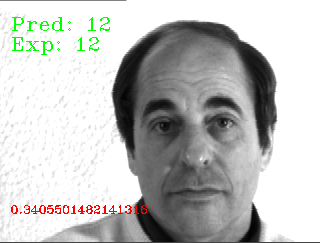

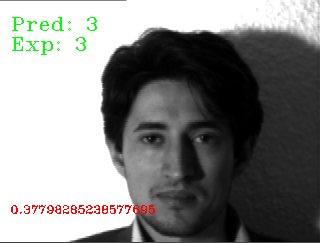

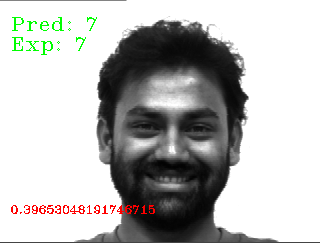

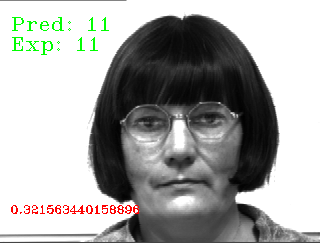

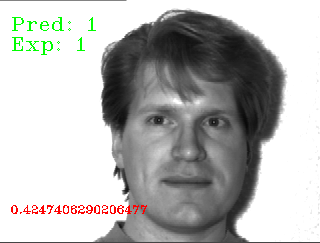

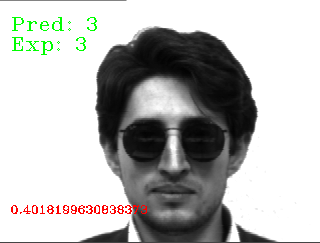

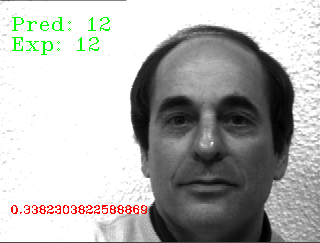

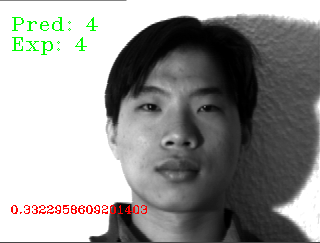

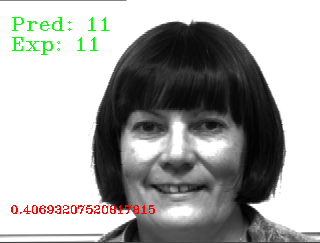

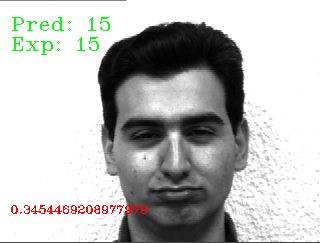

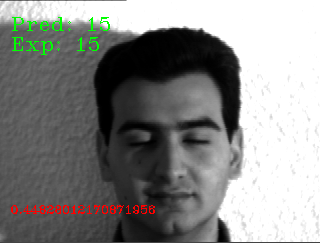

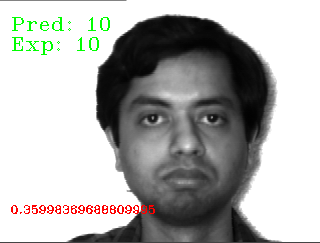

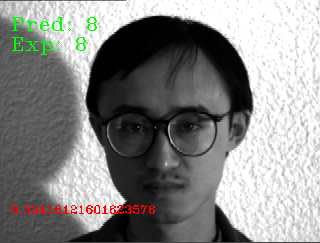

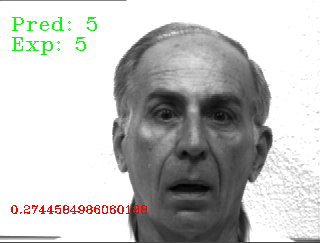

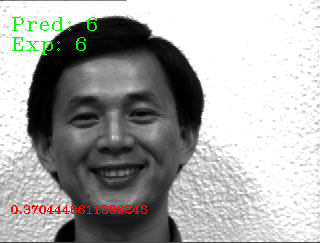

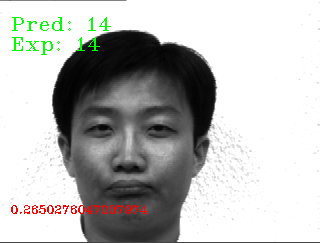

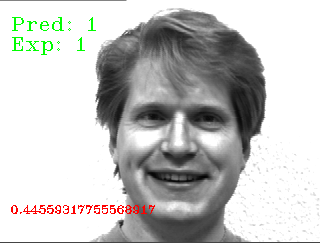

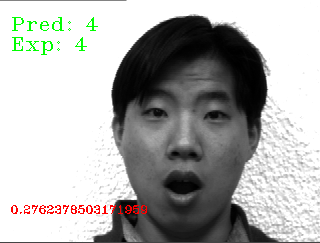

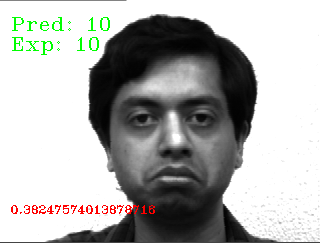

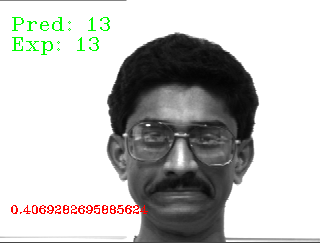

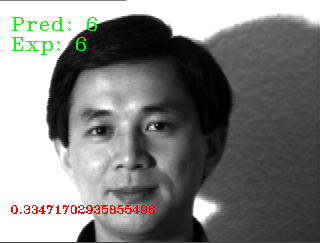

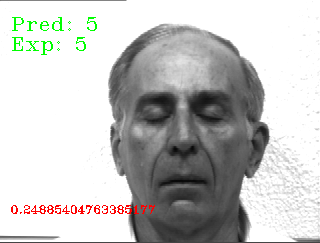

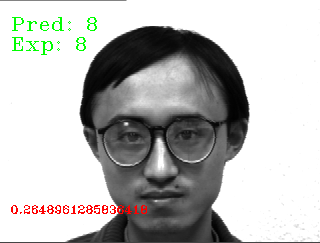

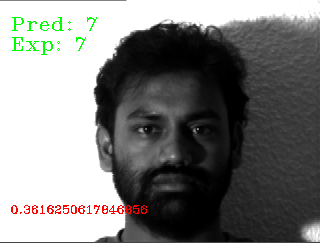

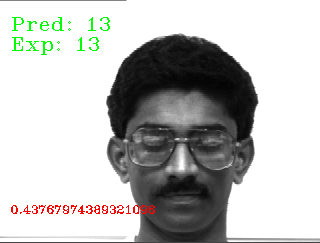

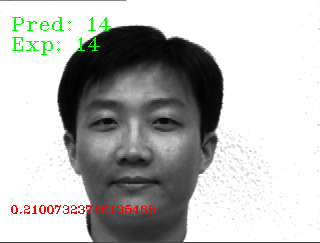

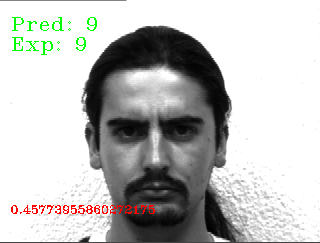

In [ ]:
predictions, expected_outputs = predict_images('/content/yalefaces/test', face_descriptors, index)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

1.0

## More challenging situations

In [ ]:
path = 'celeb_dataset.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import imutils

In [ ]:
def load_training(path_dataset, max_width=400):
  index = {}
  idx = 0
  face_descriptors = None

  subdirs = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]

  for subdir in subdirs:
    name = subdir.split(os.path.sep)[-1]
    print(name)
    images_list = [os.path.join(subdir, f) for f in os.listdir(subdir)]
    for image_path in images_list:
      image = Image.open(image_path).convert('RGB')
      image_np = np.array(image, 'uint8')

      if (image_np.shape[1] > max_width):
        image_np = imutils.resize(image_np, width=max_width)

      face_detection = face_detector(image_np, 1)
      for face in face_detection:
        image_np, face_descriptors = extract_descriptor(face, image_np, face_descriptors)

        index[idx] = image_path
        idx += 1
      cv2_imshow(cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR))

  return face_descriptors, index

In [ ]:
face_descriptors, index = load_training('/content/celeb_dataset/train')

Output hidden; open in https://colab.research.google.com to view.

### Saving facial descriptors

In [ ]:
np.save("dataset_face_descriptors.npy", face_descriptors)
with open("dataset_images_index.pickle", "wb") as f:
  pickle.dump(index, f)

In [ ]:
len(face_descriptors), len(index)

(55, 55)

In [ ]:
index

{0: '/content/celeb_dataset/train/hugh_jackman/hugh01.jpg',
 1: '/content/celeb_dataset/train/hugh_jackman/hugh04.jpg',
 2: '/content/celeb_dataset/train/hugh_jackman/hugh02.jpg',
 3: '/content/celeb_dataset/train/hugh_jackman/hugh03.jpg',
 4: '/content/celeb_dataset/train/hugh_jackman/hugh05.jpg',
 5: '/content/celeb_dataset/train/emma_stone/emma10.jpg',
 6: '/content/celeb_dataset/train/emma_stone/emma01.jpg',
 7: '/content/celeb_dataset/train/emma_stone/emma04.jpg',
 8: '/content/celeb_dataset/train/emma_stone/emma02.jpg',
 9: '/content/celeb_dataset/train/emma_stone/emma08.jpg',
 10: '/content/celeb_dataset/train/emma_stone/emma05.jpg',
 11: '/content/celeb_dataset/train/emma_stone/emma03.jpg',
 12: '/content/celeb_dataset/train/emma_stone/emma06.jpg',
 13: '/content/celeb_dataset/train/emma_stone/emma09.jpg',
 14: '/content/celeb_dataset/train/emma_stone/emma07.jpg',
 15: '/content/celeb_dataset/train/dave_grohl/dave01.jpg',
 16: '/content/celeb_dataset/train/dave_grohl/dave05.jpg

### Recognizing faces

In [ ]:
def predict_images_dataset(path_dataset, face_descriptors, index, show_imgs=True, threshold = 0.5, max_width=700):
  predictions = []
  expected_outputs = []

  subdirs = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]

  for subdir in subdirs:
    name = subdir.split(os.path.sep)[-1]

    images_list = [os.path.join(subdir, f) for f in os.listdir(subdir)]
    for image_path in images_list:
      image = Image.open(image_path).convert('RGB')
      image_np = np.array(image, 'uint8')

      if (image_np.shape[1] > max_width):
        image_np = imutils.resize(image_np, width=max_width)

      (h, w) = image_np.shape[:2]

      face_detection = face_detector(image_np, 1)
      for face in face_detection:
        points = points_detector(image_np, face)
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
        face_descriptor = face_descriptor[np.newaxis, :]

        distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        if min_distance <= threshold:
          name_pred = index[min_index].split(os.path.sep)[-2]
        else:
          name_pred = "Not identified" #-1

        name_real = name

        predictions.append(name_pred)
        expected_outputs.append(name_real)

        cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
        cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
        cv2.putText(image_np, str(min_distance), (10, h - 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (0, 0, 255))
        continue

      if show_imgs:
        cv2_imshow(cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR))

  predictions = np.array(predictions)
  expected_outputs = np.array(expected_outputs)

  return predictions, expected_outputs

In [ ]:
predictions, expected_outputs = predict_images_dataset('/content/celeb_dataset/test', face_descriptors, index, True, 0.5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
accuracy_score(expected_outputs, predictions)

0.7142857142857143

### Improving the results

In [ ]:
predictions, expected_outputs = predict_images_dataset('/content/celeb_dataset/test', face_descriptors, index, False, 0.6)

In [ ]:
accuracy_score(expected_outputs, predictions)

1.0

# Improved Deep Learning Recognition (with face_recognition)

- Created by [Adam Geitgey](https://github.com/ageitgey/face_recognition)  

## Installing and importing face_recognition

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=47eeb272e5afc37b485482e1e5a7cfcd5c2aefe4720db74e59126681d0e725ed
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition

## Encoding faces

In [ ]:
photo_jones = face_recognition.load_image_file('/content/jones.jpg')
jones_encoding = face_recognition.face_encodings(photo_jones)[0]

In [ ]:
len(jones_encoding)

128

In [ ]:
jones_encoding

array([-2.49626666e-01,  1.15394995e-01,  1.02523118e-01, -3.92704979e-02,
       -1.23352289e-01,  5.21080568e-02, -2.49851421e-02, -4.81611677e-02,
        1.49900794e-01, -1.53078675e-01,  2.44585484e-01, -2.78897434e-02,
       -3.08636099e-01,  2.50414014e-05, -8.60678479e-02,  1.84198037e-01,
       -9.47536975e-02, -7.66622871e-02, -1.49967268e-01, -1.06697932e-01,
       -2.37756632e-02,  1.07599132e-01, -2.89888233e-02,  5.85772395e-02,
       -4.72842157e-02, -3.08998138e-01, -1.24011725e-01, -6.13516793e-02,
        1.83473788e-02, -1.11100793e-01, -3.53310779e-02,  9.35781375e-03,
       -1.58261985e-01, -7.54131526e-02, -3.70524377e-02,  1.10125214e-01,
       -1.04138926e-01, -8.42362642e-02,  1.81980386e-01,  3.24233361e-02,
       -1.22423097e-01, -4.14143354e-02,  3.87742445e-02,  3.14446628e-01,
        1.06399268e-01,  4.64544259e-02, -2.07498297e-03, -2.44629383e-02,
        1.08258791e-01, -2.90810168e-01,  4.65917811e-02,  1.33138269e-01,
        1.97655737e-01,  

In [ ]:
unknown_photo = face_recognition.load_image_file('/content/jones.test01.jpg')
unknown_encoding = face_recognition.face_encodings(unknown_photo)[0]

In [ ]:
unknown_encoding

array([-0.20244177,  0.15561917,  0.03188035, -0.06555764, -0.11111584,
       -0.02934498,  0.03544082, -0.04381244,  0.20106345, -0.01659266,
        0.21696064, -0.06913286, -0.29209355, -0.08216257, -0.07755652,
        0.11152632, -0.08202167, -0.07620941, -0.15732706, -0.07540022,
        0.01661116,  0.01224057,  0.04074556,  0.08840521, -0.10462857,
       -0.32463741, -0.10444097, -0.14103356,  0.03808618, -0.12115557,
       -0.07078035,  0.01373967, -0.15120649, -0.18002911,  0.01179475,
        0.1014073 , -0.12530948, -0.06049249,  0.22000819, -0.03632142,
       -0.11113901, -0.03906679,  0.13587861,  0.29080313,  0.16020337,
        0.04546839,  0.01767236, -0.06960431,  0.13511057, -0.26352525,
        0.07587596,  0.15236309,  0.22988231,  0.12521978,  0.09720153,
       -0.13271758,  0.1067985 ,  0.1476576 , -0.25423434,  0.06983057,
        0.08303805, -0.08006848, -0.09699939,  0.01259292,  0.26967037,
        0.13997574, -0.13284099, -0.11463374,  0.16504818, -0.16

## Comparing the faces

- Documentation: https://face-recognition.readthedocs.io/en/latest/_modules/face_recognition/api.html#compare_faces

In [ ]:
results = face_recognition.compare_faces([jones_encoding], unknown_encoding)
print(results)

[True]


In [ ]:
unknown_photo = face_recognition.load_image_file('/content/gabriel.jpg')
unknown_encoding = face_recognition.face_encodings(unknown_photo)[0]
results = face_recognition.compare_faces([jones_encoding], unknown_encoding)
if results[0] == True:
  print('It is Jones')
else:
  print('It is not Jones')

It is not Jones


In [ ]:
photo_gabriel = face_recognition.load_image_file('/content/gabriel.jpg')
gabriel_encoding = face_recognition.face_encodings(photo_gabriel)[0]

In [ ]:
list_encodings = [jones_encoding, gabriel_encoding]

In [ ]:
list_names = ['Jones', 'Gabriel']

In [ ]:
test_image = cv2.imread('/content/jones.test01.jpg')
image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
face_locations = face_recognition.face_locations(image_rgb, model = 'hog')
face_encoding = face_recognition.face_encodings(image_rgb, face_locations)
face_encoding = face_encoding[0]

In [ ]:
results = face_recognition.compare_faces(list_encodings, face_encoding)
print(results)

[True, False]


In [ ]:
face_distances = face_recognition.face_distance(list_encodings, face_encoding)
print(face_distances)

[0.52891925 0.78523453]


In [ ]:
best_match_index = np.argmin(face_distances)
best_match_index

0

In [ ]:
if results[best_match_index]:
  pred = list_names[best_match_index]
  print(pred + ' is in this picture')
  cv2_imshow(test_image)
  print(face_distances[best_match_index])

Jones is in this picture


0.5289192487249668


## Encoding all image's faces from a specific path

In [ ]:
paths = [os.path.join('/content', f) for f in os.listdir('/content') if f.endswith('.jpg')]
print(paths)

['/content/people2.jpg', '/content/jones.jpg', '/content/gabriel.jpg', '/content/jones.test01.jpg']


In [ ]:
def get_encodings(paths):
  print('{} images found'.format(len(paths)))
  list_encodings = []
  list_names = []
  for img_path in paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    basename = os.path.basename(img_path)
    #print(basename)
    (name, ext) = os.path.splitext(basename)
    #print(name, ext)
    face_roi = face_recognition.face_locations(img, model = 'cnn') # hog
    face_encoding = face_recognition.face_encodings(img, face_roi)[0]
    if len(face_encoding) > 0:
      list_encodings.append(face_encoding)
      list_names.append(name)
    else:
      print('Could not detect the face from image {}'.format(img_path))
  return list_encodings, list_names

In [ ]:
list_encodings, list_names = get_encodings(paths)

4 images found


In [ ]:
len(list_encodings), len(list_names)

(4, 4)

In [ ]:
list_names

['people2', 'jones', 'gabriel', 'jones.test01']

In [ ]:
list_encodings

[array([-0.18717816,  0.06449609,  0.02529057, -0.06331039, -0.01794209,
        -0.09183795,  0.06532999, -0.14288953,  0.13769218, -0.09693342,
         0.2506789 , -0.02330202, -0.22034323, -0.14602399,  0.05163693,
         0.10324541, -0.22633159, -0.12424704, -0.10019153, -0.09433156,
         0.03389344, -0.09863712,  0.05652571,  0.04798102, -0.13783829,
        -0.27271765, -0.10929079, -0.12334367,  0.03433012, -0.07323462,
         0.0437245 ,  0.01082249, -0.21295252, -0.108565  , -0.06750259,
         0.02452613,  0.02001902,  0.00666792,  0.19502939, -0.04424765,
        -0.16272527, -0.1064721 ,  0.0004921 ,  0.24685329,  0.12193459,
        -0.01684652,  0.01982846,  0.06193048,  0.04235271, -0.24445233,
         0.01579187,  0.07924218,  0.15076216,  0.02592692,  0.03347256,
        -0.11867251,  0.04465199,  0.09806991, -0.08399233,  0.08424658,
         0.11112121, -0.14501657, -0.04732796,  0.02312826,  0.23026481,
         0.04028322, -0.10121278, -0.05668566,  0.1

In [ ]:
def recognize_faces(image, list_encodings, list_names, tolerance = 0.6):
  img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  face_locations = face_recognition.face_locations(img_rgb)
  face_encodings = face_recognition.face_encodings(img_rgb, face_locations)
  face_names = []
  conf_values = []
  for encoding in face_encodings:
    matches = face_recognition.compare_faces(list_encodings, encoding, tolerance = tolerance)
    name = 'Not identified'
    face_distances = face_recognition.face_distance(list_encodings, encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = list_names[best_match_index]
    face_names.append(name)
    conf_values.append(face_distances[best_match_index])
  face_locations = np.array(face_locations)
  return face_locations.astype(int), face_names, conf_values

## Display recognition above bounding box

- Coordinates are returned in this order: top, right, bottom, left ([ref](https://face-recognition.readthedocs.io/en/latest/face_recognition.html#face_recognition.api.face_locations))

In [ ]:
test_image = cv2.imread('/content/andrew_emma.jpg')

In [ ]:
face_locations, face_names, conf_values = recognize_faces(test_image, list_encodings, list_names)

In [ ]:
face_locations

array([[ 98, 236, 253,  81],
       [182, 397, 311, 268]])

In [ ]:
face_names

['Not identified', 'Not identified']

In [ ]:
conf_values

[0.6443964754519076, 0.9281432661640061]

0.6443964754519076
0.9281432661640061


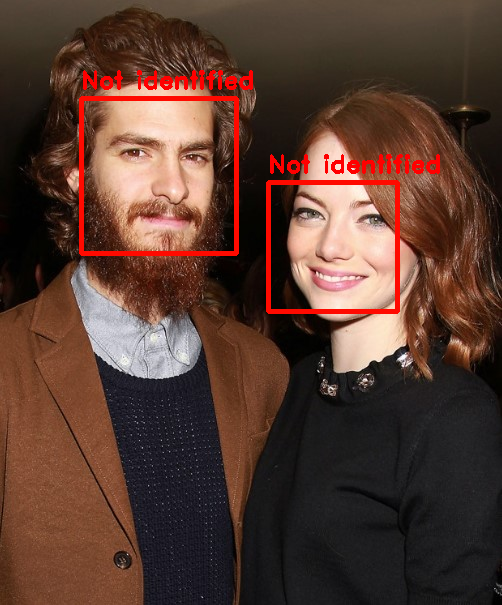

In [ ]:
for face_loc, name, conf in zip(face_locations, face_names, conf_values):
  y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]
  cv2.putText(test_image, name, (x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0,0,255), 2)
  cv2.rectangle(test_image, (x1, y1), (x2, y2), (0,10,255), 4)
  print(conf)
cv2_imshow(test_image)

In [ ]:
def show_recognition(test_image, list_encodings, list_names, max_width=700, tolerance=0.6):
  face_locations, face_names, conf_values = recognize_faces(test_image, list_encodings, list_names, tolerance)

  for face_loc, name, conf in zip(face_locations, face_names, conf_values):
    y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]

    cv2.putText(test_image, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0, 0, 255), 2)
    cv2.rectangle(test_image, (x1, y1), (x2, y2), (0, 10, 255), 4)
    print(conf)

  if (test_image.shape[1] > max_width):
    test_image = imutils.resize(test_image, width=max_width)
  cv2_imshow(test_image)

0.7514724769358152


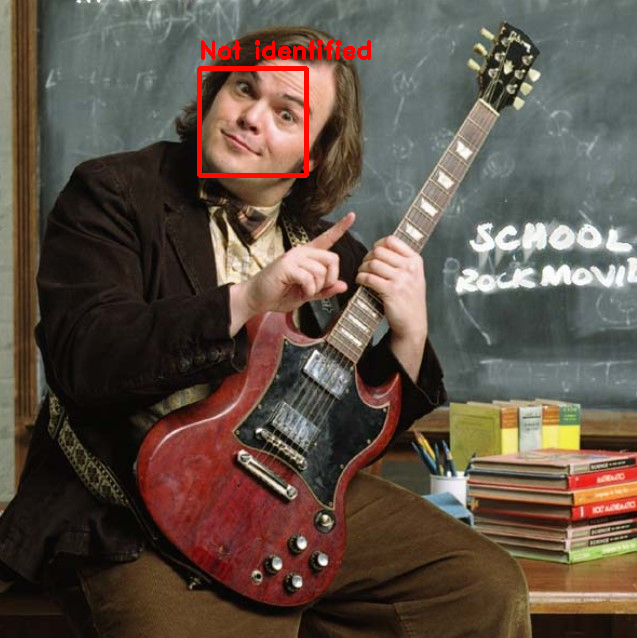

In [ ]:
test_image = cv2.imread('/content/jack.test01.jpg')
show_recognition(test_image, list_encodings, list_names)

### Recognize all faces from path



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_test = "/content/drive/MyDrive/test"
images_test = [os.path.join(path_test, f) for f in os.listdir(path_test)]
images_test

['/content/drive/MyDrive/test/emma.test01.jpg',
 '/content/drive/MyDrive/test/dave.test02.jpg',
 '/content/drive/MyDrive/test/andrew_emma.jpg',
 '/content/drive/MyDrive/test/gabriel.test01.jpg',
 '/content/drive/MyDrive/test/benedict.test02.jpg',
 '/content/drive/MyDrive/test/jack.test01.jpg',
 '/content/drive/MyDrive/test/benedict.test01.jpg',
 '/content/drive/MyDrive/test/jones.test01.jpg',
 '/content/drive/MyDrive/test/dave.test01.jpg',
 '/content/drive/MyDrive/test/gabriel.test02.jpg']

In [ ]:
for image_path in images_test:
  print(image_path)
  test_image = cv2.imread(image_path)
  show_recognition(test_image, list_encodings, list_names)

Output hidden; open in https://colab.research.google.com to view.

## Testing the celebrity dataset

In [ ]:
import zipfile
path = 'celeb_dataset.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
def load_encodings(path_dataset):
  list_encodings = []
  list_names = []

  subdirs = [os.path.join(path_dataset, f) for f in os.listdir(path_dataset)]

  for subdir in subdirs:
    name = subdir.split(os.path.sep)[-1]
    images_list = [os.path.join(subdir, f) for f in os.listdir(subdir) if not os.path.basename(f).startswith(".")]

    for image_path in images_list:
      img = cv2.imread(image_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      print(name + " <-- " + image_path)

      face_roi = face_recognition.face_locations(img, model="cnn") # cnn or hog

      (start_y, end_x, end_y, start_x) = face_roi[0]
      roi = img[start_y:end_y,start_x:end_x]
      roi = imutils.resize(roi, width=100)
      cv2_imshow(cv2.cvtColor(roi, cv2.COLOR_RGB2BGR))

      img_encoding = face_recognition.face_encodings(img, face_roi)
      if (len(img_encoding) > 0):
        img_encoding = img_encoding[0]
        list_encodings.append(img_encoding)
        list_names.append(name)
      else:
        print("Couldn't encode face from image => {}".format(image_path))

  return list_encodings, list_names

In [ ]:
train_path = "/content/celeb_dataset/train/"

hugh_jackman <-- /content/celeb_dataset/train/hugh_jackman/hugh01.jpg


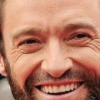

hugh_jackman <-- /content/celeb_dataset/train/hugh_jackman/hugh04.jpg


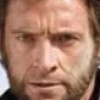

hugh_jackman <-- /content/celeb_dataset/train/hugh_jackman/hugh02.jpg


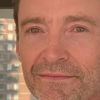

hugh_jackman <-- /content/celeb_dataset/train/hugh_jackman/hugh03.jpg


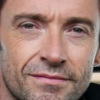

hugh_jackman <-- /content/celeb_dataset/train/hugh_jackman/hugh05.jpg


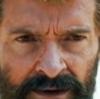

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma10.jpg


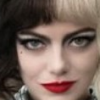

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma01.jpg


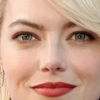

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma04.jpg


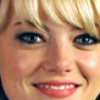

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma02.jpg


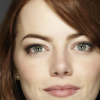

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma08.jpg


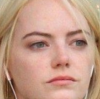

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma05.jpg


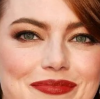

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma03.jpg


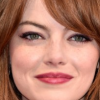

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma06.jpg


emma_stone <-- /content/celeb_dataset/train/emma_stone/emma09.jpg


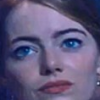

emma_stone <-- /content/celeb_dataset/train/emma_stone/emma07.jpg


dave_grohl <-- /content/celeb_dataset/train/dave_grohl/dave01.jpg


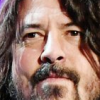

dave_grohl <-- /content/celeb_dataset/train/dave_grohl/dave05.jpg


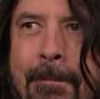

dave_grohl <-- /content/celeb_dataset/train/dave_grohl/dave02.jpg


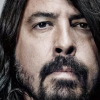

dave_grohl <-- /content/celeb_dataset/train/dave_grohl/dave03.jpg


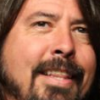

dave_grohl <-- /content/celeb_dataset/train/dave_grohl/dave04.jpg


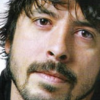

andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew04.jpg


andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew08.jpg


andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew09.jpg


andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew05.jpg


andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew07.jpg


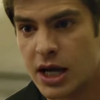

andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew03.jpg


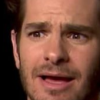

andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew06.jpg


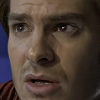

andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew01.jpg


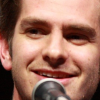

andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew10.jpg


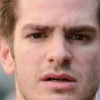

andrew_garfield <-- /content/celeb_dataset/train/andrew_garfield/andrew02.jpg


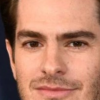

taraji_p_henson <-- /content/celeb_dataset/train/taraji_p_henson/taraji02.jpg


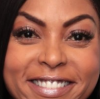

taraji_p_henson <-- /content/celeb_dataset/train/taraji_p_henson/taraji01.jpg


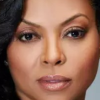

taraji_p_henson <-- /content/celeb_dataset/train/taraji_p_henson/taraji03.jpg


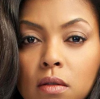

taraji_p_henson <-- /content/celeb_dataset/train/taraji_p_henson/taraji05.jpg


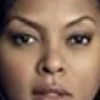

taraji_p_henson <-- /content/celeb_dataset/train/taraji_p_henson/taraji04.jpg


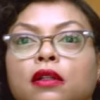

rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel01.jpg


rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel06.jpg


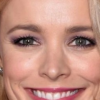

rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel03.jpg


rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel09.jpg


rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel02.jpg


rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel08.jpg


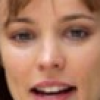

rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel07.jpg


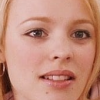

rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel10.jpg


rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel05.jpg


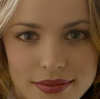

rachel_mcadams <-- /content/celeb_dataset/train/rachel_mcadams/rachel04.jpg


benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict06.jpg


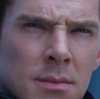

benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict09.jpg


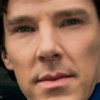

benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict07.jpg


benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict05.jpg


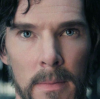

benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict08.jpg


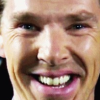

benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict04.jpg


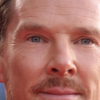

benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict02.jpg


benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict10.jpg


benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict01.jpg


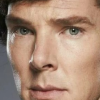

benedict_cumberbatch <-- /content/celeb_dataset/train/benedict_cumberbatch/benedict03.jpg


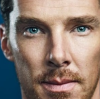

In [ ]:
list_encodings, list_names = load_encodings(train_path)

In [ ]:
len(list_encodings), len(list_names)

(55, 55)

### Storing and loading encodings

In [ ]:
import pickle
pickle_name = "face_encodings_celebs.pickle"
encodings_data = {"encodings": list_encodings, "names": list_names}
f = open(pickle_name, "wb")
f.write(pickle.dumps(encodings_data))
f.close()

In [ ]:
data_encoding = pickle.loads(open(pickle_name, "rb").read())

In [ ]:
list_encodings = data_encoding["encodings"]
list_names = data_encoding["names"]

In [ ]:
len(list_encodings)

55

### Test recognition on image

0.4806278389278245


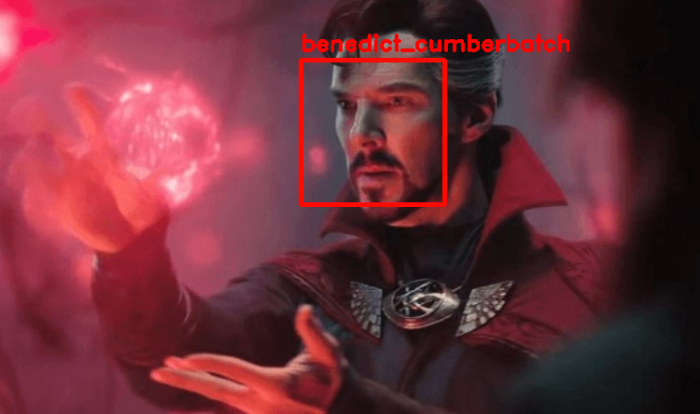

In [ ]:
image_path = "/content/drive/MyDrive/test/benedict.test02.jpg"
test_image = cv2.imread(image_path)
show_recognition(test_image, list_encodings, list_names)

## Recognition on all test set

In [ ]:
test_path = "/content/celeb_dataset/test/"

max_width = 700

subdirs = [os.path.join(test_path, f) for f in os.listdir(test_path) if not os.path.basename(f).startswith(".")]

for subdir in subdirs:
  exp_name = subdir.split(os.path.sep)[-1]    # get the name of the subdirectory (which is named after the person)

  images_list = [os.path.join(subdir, f) for f in os.listdir(subdir) if not os.path.basename(f).startswith(".")]
  for image_path in images_list:
    img_path = os.path.join(subdir, image_path)
    img = cv2.imread(img_path)

    if (img.shape[1] > max_width):
      img = imutils.resize(img, width=max_width)

    face_locations, face_names, conf_values = recognize_faces(img, list_encodings, list_names)

    for face_loc, name, conf in zip(face_locations, face_names, conf_values):
      y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]

      conf = "{:.8f}".format(conf)
      cv2.putText(img, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.7, (20, 255, 0), 2)
      cv2.rectangle(img, (x1, y1), (x2, y2), (20, 255, 0), 4)
      cv2.putText(img, conf,(x1, y2 + 15), cv2.FONT_HERSHEY_DUPLEX, 0.5, (20, 255, 0), 1)

    cv2_imshow(img)
    print("{} recognized as {} (confidence: {}) \n".format(exp_name, name, conf))

Output hidden; open in https://colab.research.google.com to view.

### More testing images

In [ ]:
path_test = "celeb_dataset/mix/"
images_test = [os.path.join(path_test, f) for f in os.listdir(path_test)]
images_test

for image_path in images_test:
  print(image_path)
  test_image = cv2.imread(image_path)
  show_recognition(test_image, list_encodings, list_names)

Output hidden; open in https://colab.research.google.com to view.

# Additional features for face applications





## Face align

In [ ]:
def draw_points(image, face_landmarks):
  for p in face_landmarks.parts():
    cv2.circle(image, (p.x, p.y), 2, (0,255,0), 2)

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/shape_predictor_5_face_landmarks.dat')

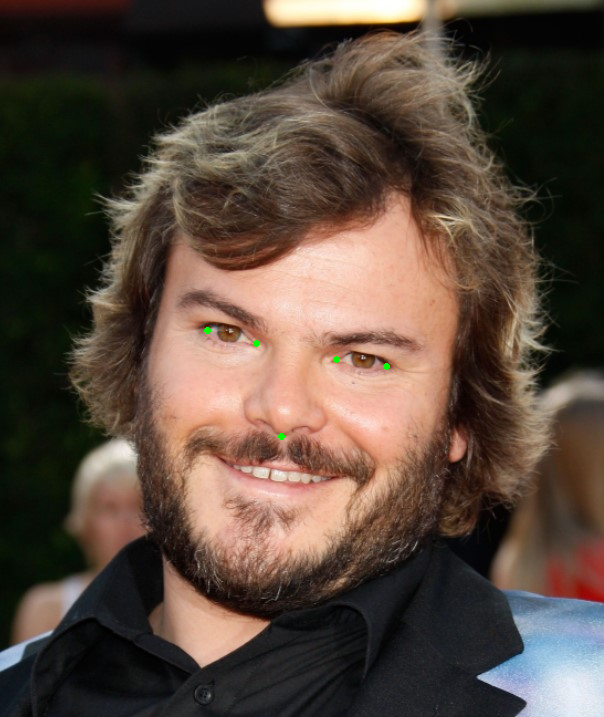

In [ ]:
image = cv2.imread('/content/jack_black.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
face_detection = face_detector(rgb, 1)
face_points = dlib.full_object_detections()
for face in face_detection:
  points = points_detector(rgb, face)
  face_points.append(points)
  draw_points(image, points)
cv2_imshow(image)

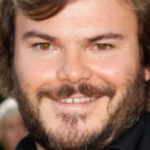

(150, 150, 3)


In [ ]:
images = dlib.get_face_chips(rgb, face_points)
for img in images:
  bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  cv2_imshow(bgr)
  print(img.shape)

## Draw facial elements

In [ ]:
from PIL import Image, ImageDraw
image = cv2.imread('/content/drive/MyDrive/test/dave.test01.jpg')
face_landmarks_list = face_recognition.face_landmarks(image)

In [ ]:
face_landmarks_list[0]['left_eye']

[(469, 181), (480, 170), (493, 169), (507, 178), (494, 180), (480, 182)]

In [ ]:
image_pil = Image.fromarray(image)
d = ImageDraw.Draw(image_pil)
for face_landmarks in face_landmarks_list:
  for facial_feature in face_landmarks.keys():
    print('The {} in this face has the following points: {}'.format(facial_feature, face_landmarks[facial_feature]))
    d.line(face_landmarks[facial_feature], width = 5)
result_img = np.asarray(image_pil)
cv2_imshow(cv2.resize(result_img, (0,0), fx = 0.75, fy = 0.75))

The chin in this face has the following points: [(423, 213), (421, 238), (419, 264), (422, 290), (434, 313), (452, 330), (478, 341), (505, 350), (535, 353), (563, 350), (588, 340), (610, 327), (624, 308), (634, 284), (635, 259), (631, 234), (627, 212)]
The left_eyebrow in this face has the following points: [(448, 179), (457, 159), (476, 146), (500, 144), (520, 150)]
The right_eyebrow in this face has the following points: [(542, 153), (562, 145), (583, 145), (601, 155), (610, 174)]
The nose_bridge in this face has the following points: [(531, 168), (531, 177), (531, 185), (531, 196)]
The nose_tip in this face has the following points: [(510, 223), (521, 224), (532, 224), (544, 223), (554, 222)]
The left_eye in this face has the following points: [(469, 181), (480, 170), (493, 169), (507, 178), (494, 180), (480, 182)]
The right_eye in this face has the following points: [(556, 178), (568, 168), (581, 169), (591, 178), (581, 180), (569, 180)]
The top_lip in this face has the following p